In [20]:
"""
Copyright 2021 Huawei Technologies Co., Ltd

CREATED:  2020-6-04 20:12:13
MODIFIED: 2021-11-01 01:48:45
"""

# -*- coding:utf-8 -*-
import cv2
import numpy as np

from acl_model import Model
from PIL import Image, ImageDraw

In [21]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
device_id = 0
model_path = "model/mask_model.om"
class_names = ['Masked', 'No Mask']

In [23]:
model = Model(device_id, model_path)

[ACL] init resource stage:
[ACL] init resource stage success
[Model] class Model init resource stage:
[Model] create model output dataset:
[Model] create model output dataset success
model input size 1
input  0
model input dims ({'name': 'input.1', 'dimCount': 4, 'dims': [1, 3, 128, 128]}, 0)
model input datatype 0
model output size 1
output  0
model output dims ({'name': 'Sigmoid_170:0', 'dimCount': 2, 'dims': [1, 1]}, 0)
model output datatype 0
[Model] class Model init resource stage success
[Model] class Model release source success
[ACL] class Sample release source success


In [36]:
img_path = "data/no_mask/test3.jpg"
# load image
img_bgr = cv2.imread(img_path)

In [37]:
thresh = 0.45
score_class = model.run(img_bgr, thresh)

[INFO] classifying face . . .
[PreProc] img_resized shape (3, 128, 128)
[ACL] img_host_ptr, img_buf_size:  94489378081152 196608
[ACL] img_dev_ptr, img_buf_size:  18143019794432 196608
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute stage success
[Result] score : 0.0473
[INFO] classification done!
[Result] image runtime : 0.006


0.047 %  |  1  |  No Mask


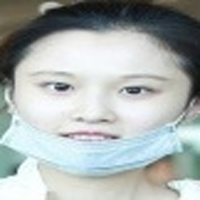

In [38]:
# show score and img
print("%.3f %%  |  %d  |  %s"%(score_class[0], int(score_class[1]), class_names[int(score_class[1])]))

im_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_plw = Image.fromarray(im_rgb)
img_plw